In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import numpy as np

def score_calculator(testY, pred, std, actual_threshold, pred_thresholds):
    actual_val = np.array(testY).flatten()
    pred_val = np.array(pred).flatten()
    std_val = np.array(std).flatten()

    percentage_error = np.abs(actual_val - pred_val) / (np.abs(actual_val) + 1e-8)
    pct_err_gt_thresh = percentage_error > actual_threshold
    pct_err_gt_thresh = np.array(pct_err_gt_thresh)

    pct_err_gt_thresh = pct_err_gt_thresh[:, np.newaxis]
    std_val_reshaped = std_val[:, np.newaxis]
    pred_thresholds_reshaped = pred_thresholds[np.newaxis, :]

    std_gt_pred_thresh = std_val_reshaped > pred_thresholds_reshaped
    
    TP = np.sum(pct_err_gt_thresh & std_gt_pred_thresh, axis=0)
    FP = np.sum((~pct_err_gt_thresh) & std_gt_pred_thresh, axis=0)
    FN = np.sum(pct_err_gt_thresh & (~std_gt_pred_thresh), axis=0)
    TN = np.sum((~pct_err_gt_thresh) & (~std_gt_pred_thresh), axis=0)
    
    # Calculate rates with zero-division protection
    tpr = np.where((TP + FN) > 0, TP / (TP + FN), 0.0)
    fpr = np.where((FP + TN) > 0, FP / (FP + TN), 0.0)
    
    return tpr, fpr

In [ ]:
df = pd.read_csv("tables_for_analysis/XGBoost_results.csv")
df

,Unnamed: 0,actual_dele,pred_xgb,percent_error_xgb
0,0,0.000067,-0.024379,6.047186
1,1,-0.006115,-0.005951,5.306468
2,2,0.027774,0.033766,4.944227
3,3,-0.041527,-0.038133,-2.183599
4,4,-0.038788,-0.053605,-4.710477
...,...,...,...,...
99901,99901,-0.007436,-0.006675,-9.691001
99902,99902,0.036921,0.037509,7.114975
99903,99903,0.045792,0.039074,19.883968
99904,99904,-0.001959,0.004483,-5.561484


In [ ]:
actual_threshold = 0.05
pred_thresholds = np.linspace(0, 0.15, 1000)
testY = df["actual_dele"]
pred = df["pred_xgb"]
error = df["percent_error_xgb"] * 0.01
tpr, fpr = score_calculator(testY, pred, error, actual_threshold, pred_thresholds)


In [38]:
fpr = np.array(fpr)
tpr = np.array(tpr)
sorted_indices = np.argsort(fpr)
fpr = fpr[sorted_indices]
tpr = tpr[sorted_indices]

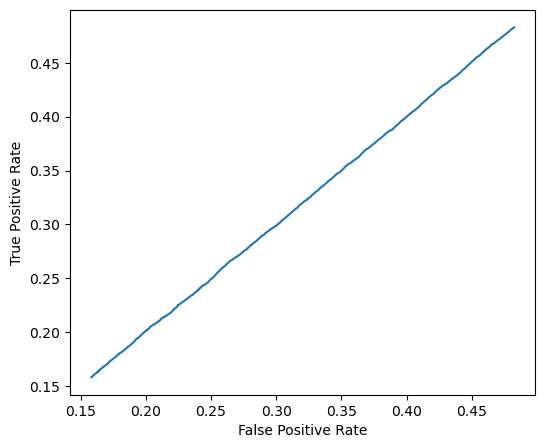

In [39]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [40]:
from sklearn.metrics import auc
auc_score = auc(fpr, tpr)
print(f"the AUC score is {auc_score}")

the AUC score is 0.10385999798690707


In [ ]:
df_nn = pd.read_csv("tables_for_analysis/Neural_Network_results.csv")
df_ngb = pd.read_csv("tables_for_analysis/NGBoost_results.csv")